# OpenMP Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce-435-f25/python-3.10.8/lib/python3.10/site-packages")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Seaborn not found, so skipping imports of plotting in thicket.stats
To enable this plotting, install seaborn or thicket[plotting]


Dataset is parallel performance profiles of an LU decomposition program, parallelized with OpenMP.

Threads are varied 1, 2, 4, 8, 16, 32, 64, 96, 128, 256, 512

Matrix sizes are varied 128, 1024, 4096

In [2]:
# Read all of the files
tk = th.Thicket.from_caliperreader("trials")

(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 18.06it/s]
0it [00:00, ?it/s]


View the Performance Data Table

In [3]:
# Performance data
tk.dataframe

,,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls (total),name
node,profile,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",16927281562023,1.0,"(regionprofile,)",167.542000,169.098000,168.320000,336.639000,137.796000,138.219000,138.008000,276.015000,NaN,NaN,NaN,NaN,main
"{'name': 'data_init_runtime', 'type': 'function'}",16927281562023,2.0,"(regionprofile,)",2.226130,2.226440,2.226290,4.452580,2.226130,2.226440,2.226290,4.452580,1.0,1.0,1.0,2.0,data_init_runtime
"{'name': 'comp', 'type': 'function'}",16927281562023,3.0,"(regionprofile,)",26.922100,27.961400,27.441700,54.883400,0.000084,0.000148,0.000116,0.000232,1.0,1.0,2.0,3.0,comp
"{'name': 'comp_small_merge_sort', 'type': 'function'}",16927281562023,4.0,"(regionprofile,)",26.922000,27.004700,26.963300,53.926700,26.922000,27.004700,26.963300,53.926700,1.0,1.0,1.0,2.0,comp_small_merge_sort
"{'name': 'comp_large_merge_arrays', 'type': 'function'}",16927281562023,7.0,"(regionprofile,)",0.956512,0.956512,0.956512,0.956512,0.956512,0.956512,0.956512,0.956512,1.0,1.0,1.0,1.0,comp_large_merge_arrays
"{'name': 'comm', 'type': 'function'}",16927281562023,5.0,"(regionprofile,)",0.174075,0.515651,0.344863,0.689726,0.000031,0.000044,0.000037,0.000075,1.0,1.0,1.0,2.0,comm
"{'name': 'comm_large_recv', 'type': 'function'}",16927281562023,6.0,"(regionprofile,)",0.515620,0.515620,0.515620,0.515620,0.515620,0.515620,0.515620,0.515620,1.0,1.0,1.0,1.0,comm_large_recv
"{'name': 'comm_large_send', 'type': 'function'}",16927281562023,9.0,"(regionprofile,)",0.174031,0.174031,0.174031,0.174031,0.174031,0.174031,0.174031,0.174031,1.0,1.0,1.0,1.0,comm_large_send
"{'name': 'correctness_check', 'type': 'function'}",16927281562023,8.0,"(regionprofile,)",0.598421,0.598421,0.598421,0.598421,0.598421,0.598421,0.598421,0.598421,1.0,1.0,1.0,1.0,correctness_check


View the Metadata Table

In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2025.1.0

168.320 main
├─ 2.226 data_init_runtime
├─ 27.442 comp
│  ├─ 26.963 comp_small_merge_sort
│  └─ 0.957 comp_large_merge_arrays
├─ 0.345 comm
│  ├─ 0.516 comm_large_recv
│  └─ 0.174 comm_large_send
└─ 0.598 correctness_check

Legend (Metric: Avg time/rank Min: 0.17 Max: 168.32 indices: {'profile': np.int64(16927281562023)})
█ 151.51 - 168.32
█ 117.88 - 151.51
█ 84.25 - 117.88
█ 50.62 - 84.25
█ 16.99 - 50.62
█ 0.17 - 16.99

name User code    ◀  Only in left graph    ▶  Only in right graph



In [9]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,opts:node.order,opts:output,opts:region.count,opts:time.exclusive
profile,,,,,,,,,,,,
16927281562023,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,2.cali,true,true


Add experiment parameters to performance data table to use as index

`profile -> threads x matrix_size`

In [10]:
tk.metadata_columns_to_perfdata(["num_procs", "matrix_size"])

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "matrix_size"]).sort_index()
tk.dataframe


KeyError: "None of [Index(['num_procs', 'matrix_size'], dtype='object')] are in the [columns]"

Perform pandas operations to get the table in a desirable format for plotting

In [ ]:
# Define common variables
num_procs = sorted(tk.metadata["num_procs"].unique())
matrix_sizes = sorted(tk.metadata["matrix_size"].unique())


# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [19]:
def plot_pandas(df, title, xlabel, ylabel):
    
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    plt.xscale("log", base=2)  # Log scale with base 2
    plt.yscale('log')
    # plt.xticks(len(df),[2,4,8,16,32,64])
    return plot

# Plotting Examples

In [20]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

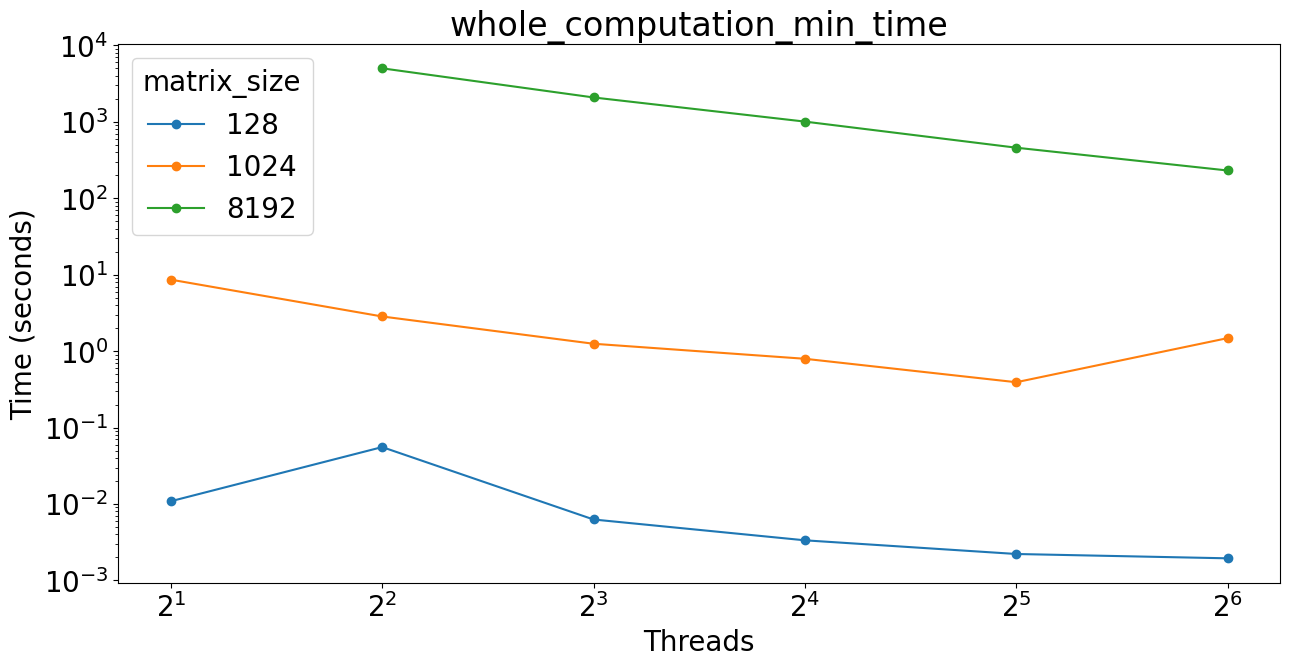

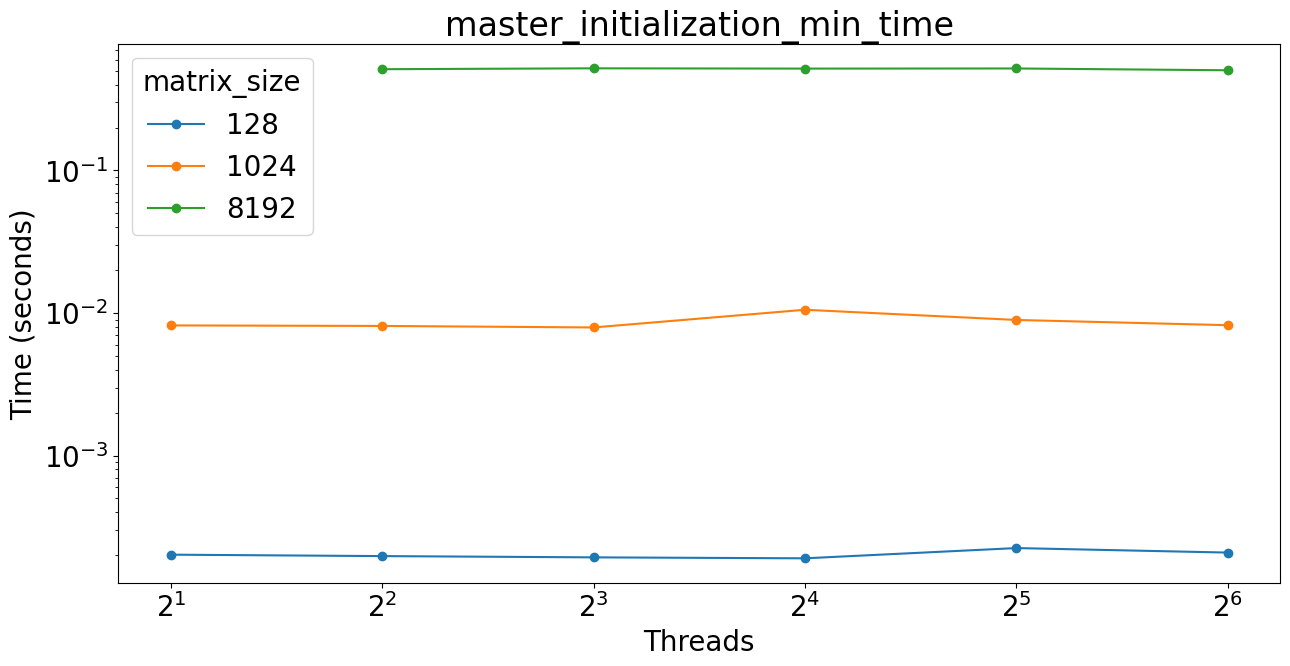

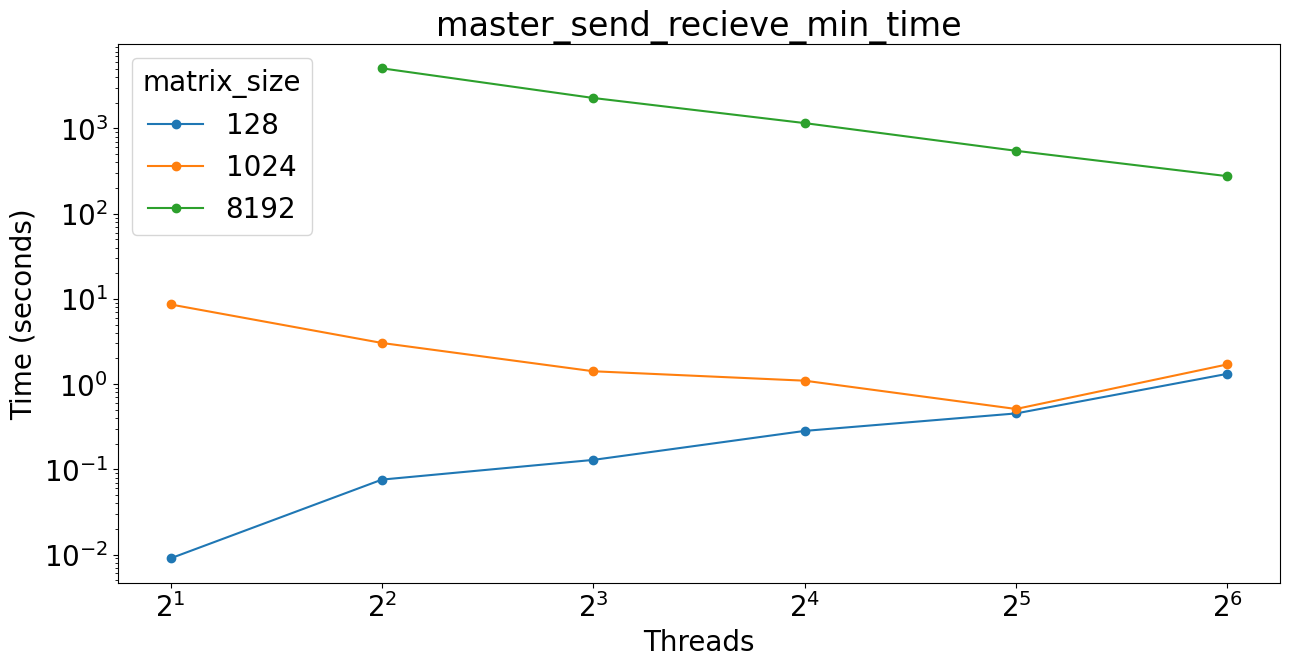

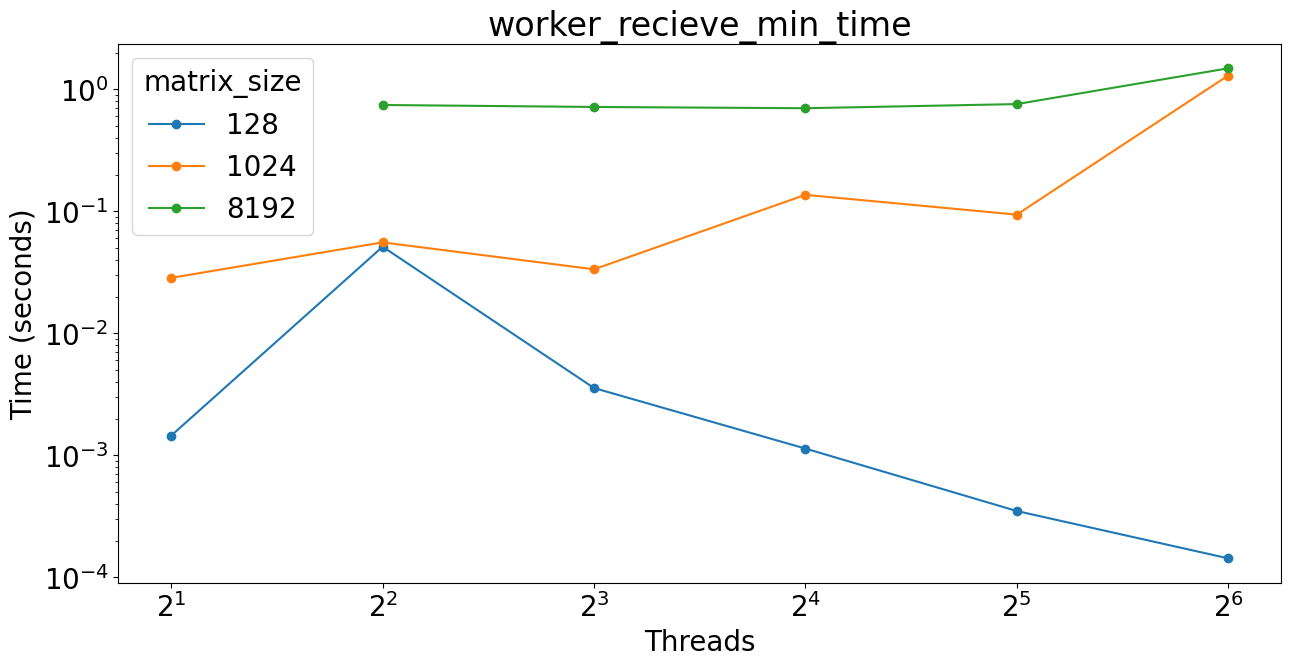

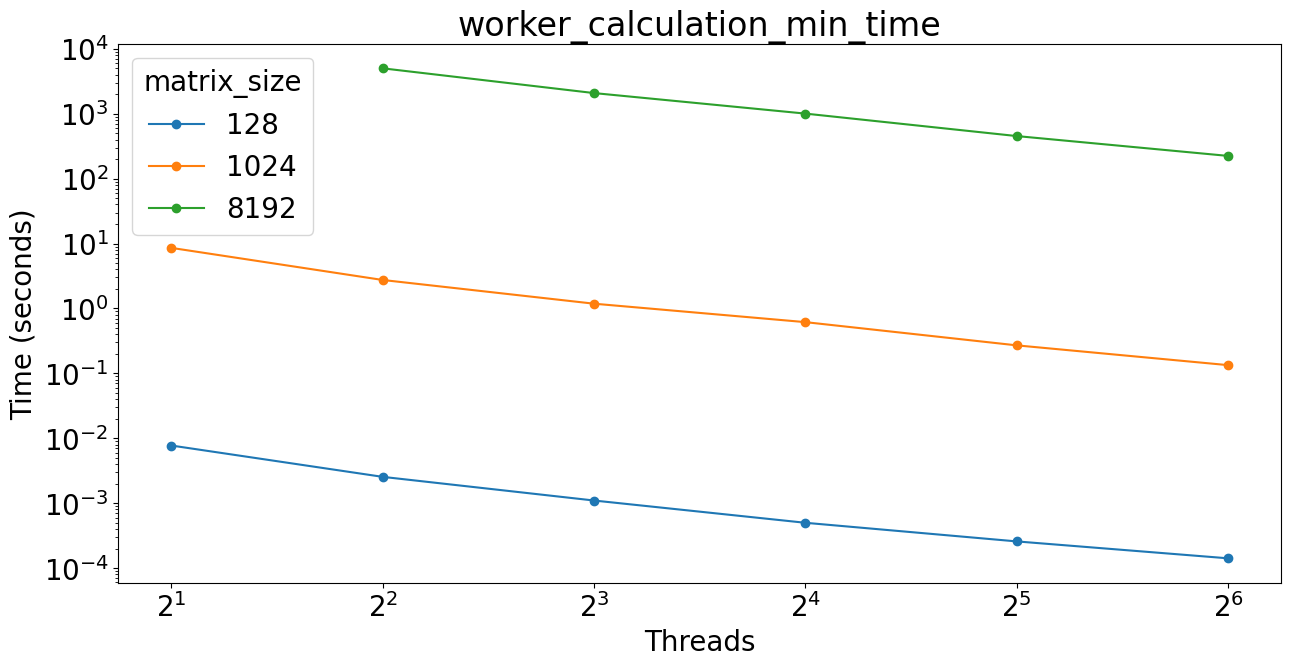

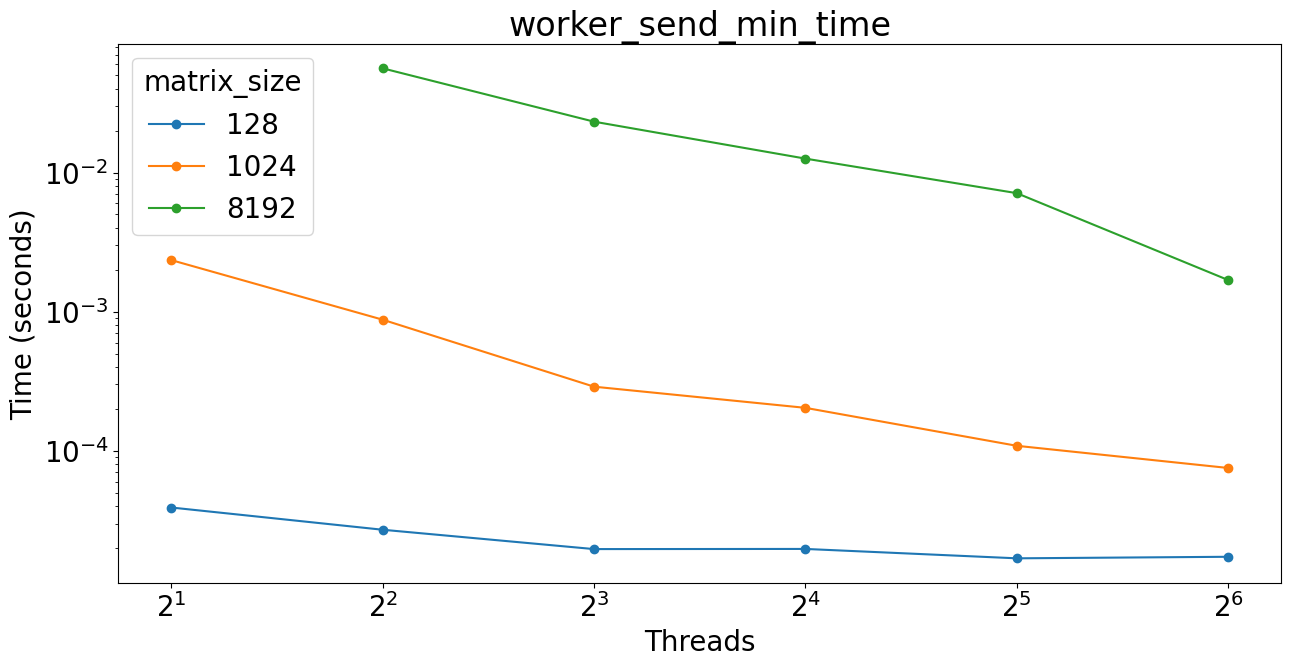

In [21]:
for node in tk.graph.traverse():
    if (node.frame["name"] != 'main'):
        plot_pandas(
            df=tk.dataframe.loc[node,
                                "Min time/rank"].unstack(level="matrix_size"),
            title=node.frame["name"] + "_min_time",
            xlabel="Threads",
            ylabel="Time (seconds)",
        )

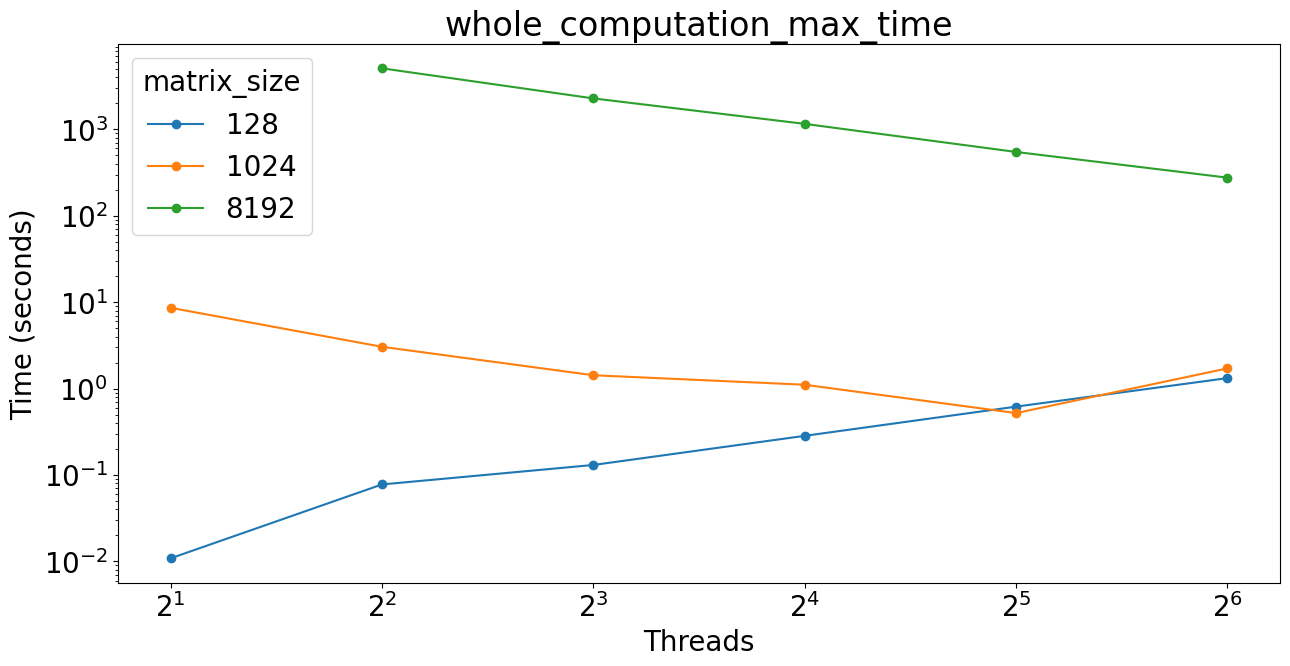

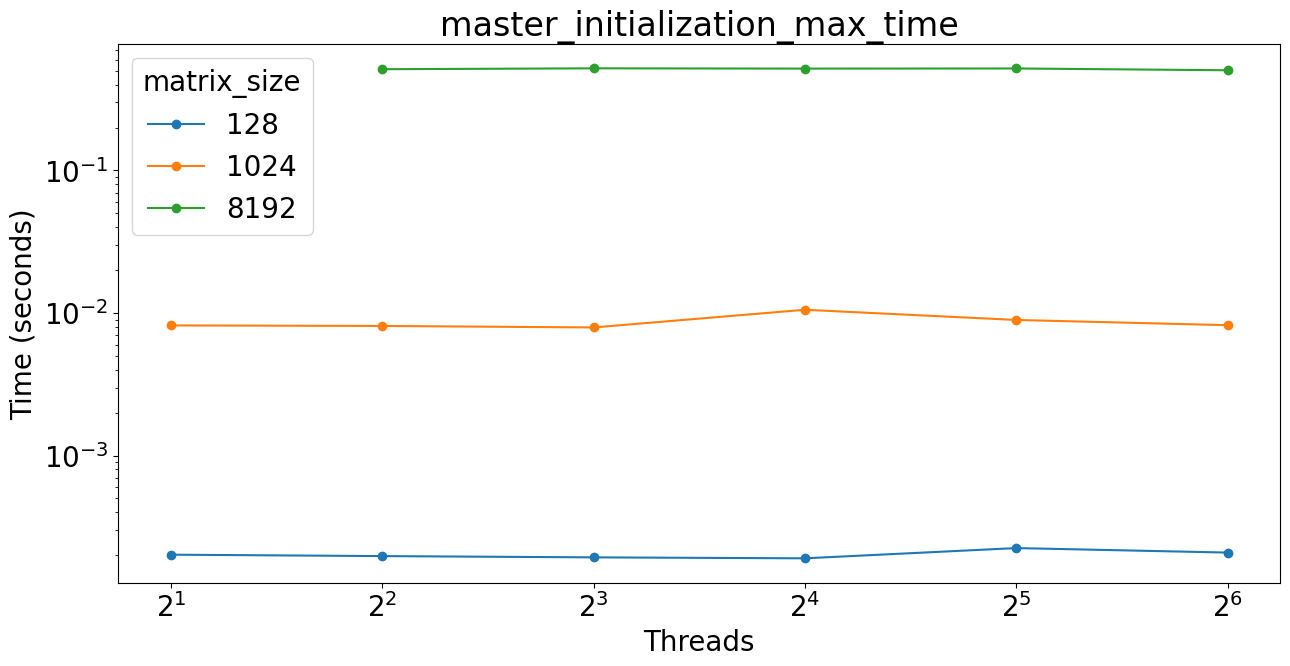

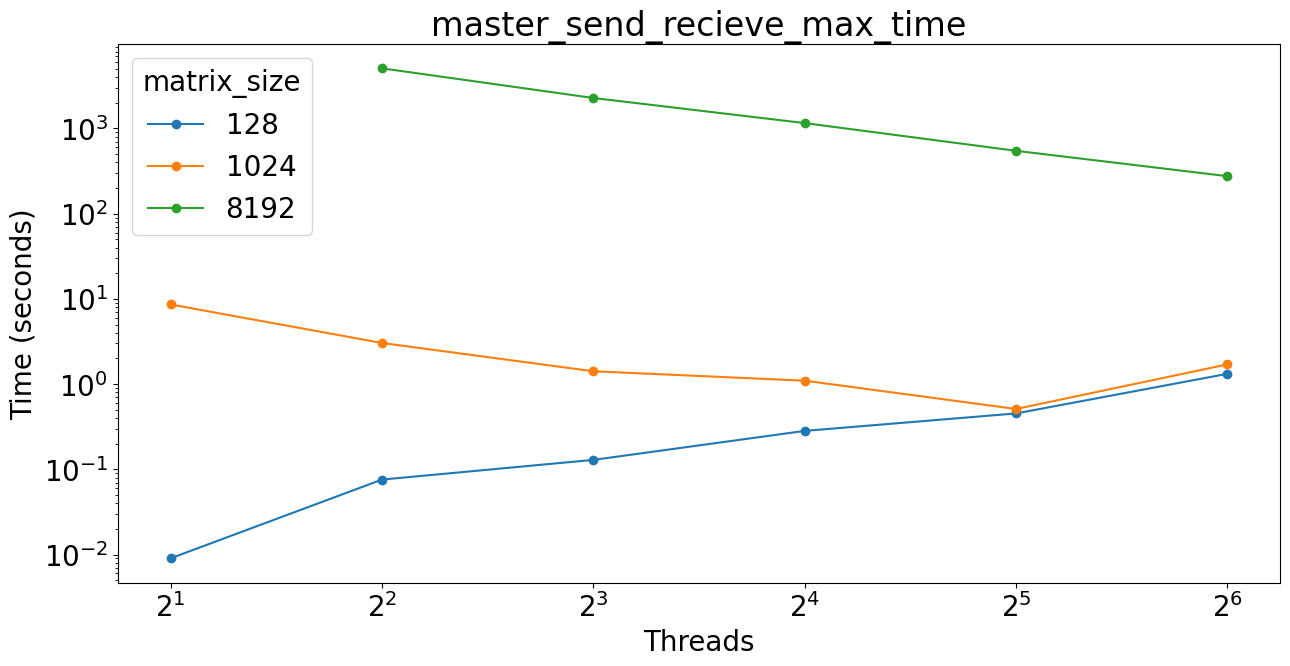

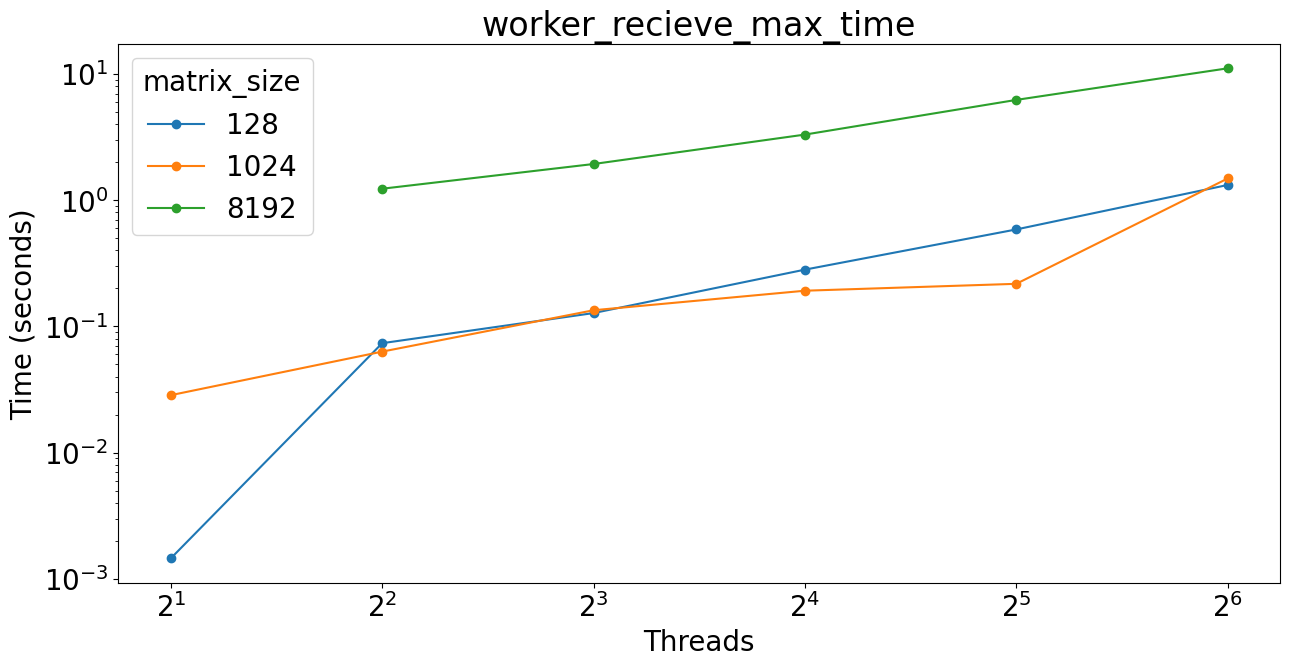

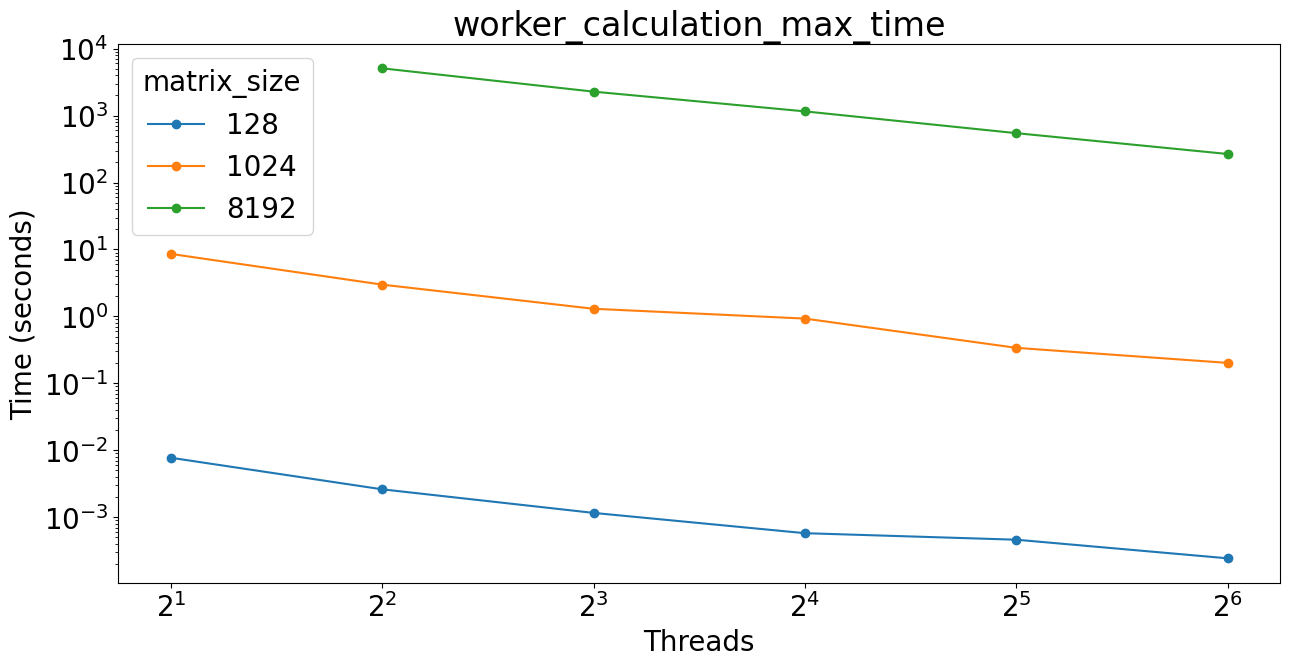

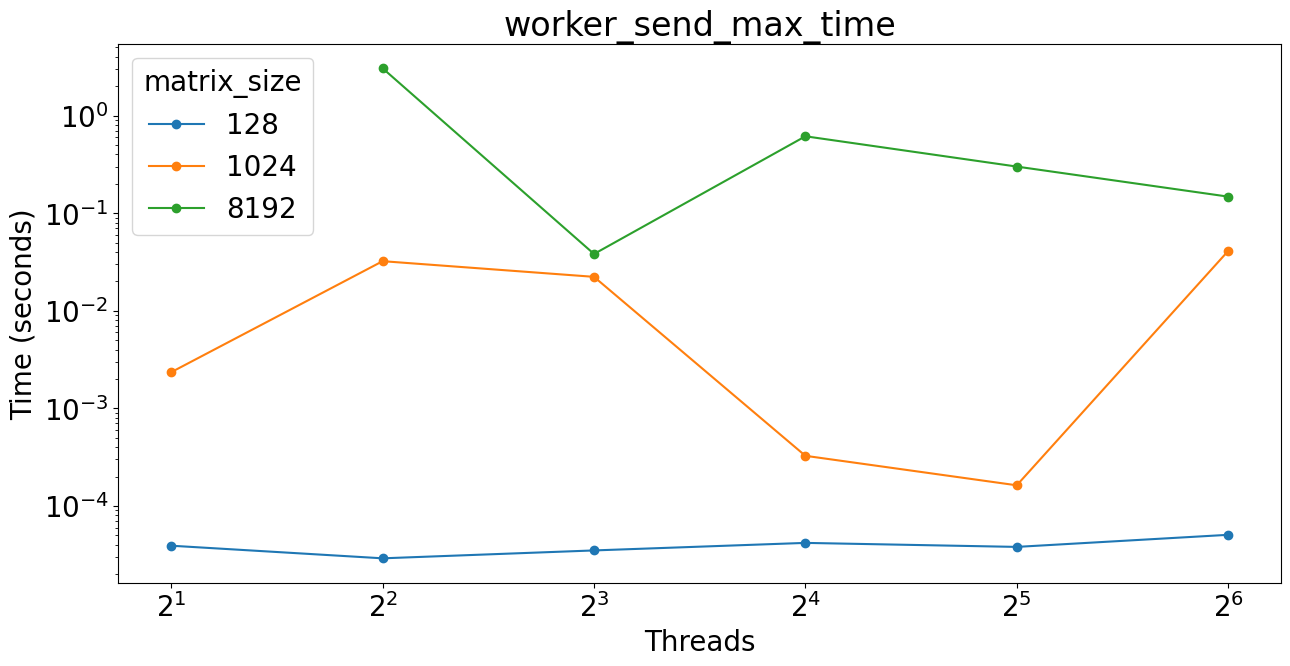

In [22]:
for node in tk.graph.traverse():
    if (node.frame["name"] != 'main'):

        plot_pandas(
            df=tk.dataframe.loc[node,
                                "Max time/rank"].unstack(level="matrix_size"),
            title=node.frame["name"] + "_max_time",
            xlabel="Threads",
            ylabel="Time (seconds)",
        )

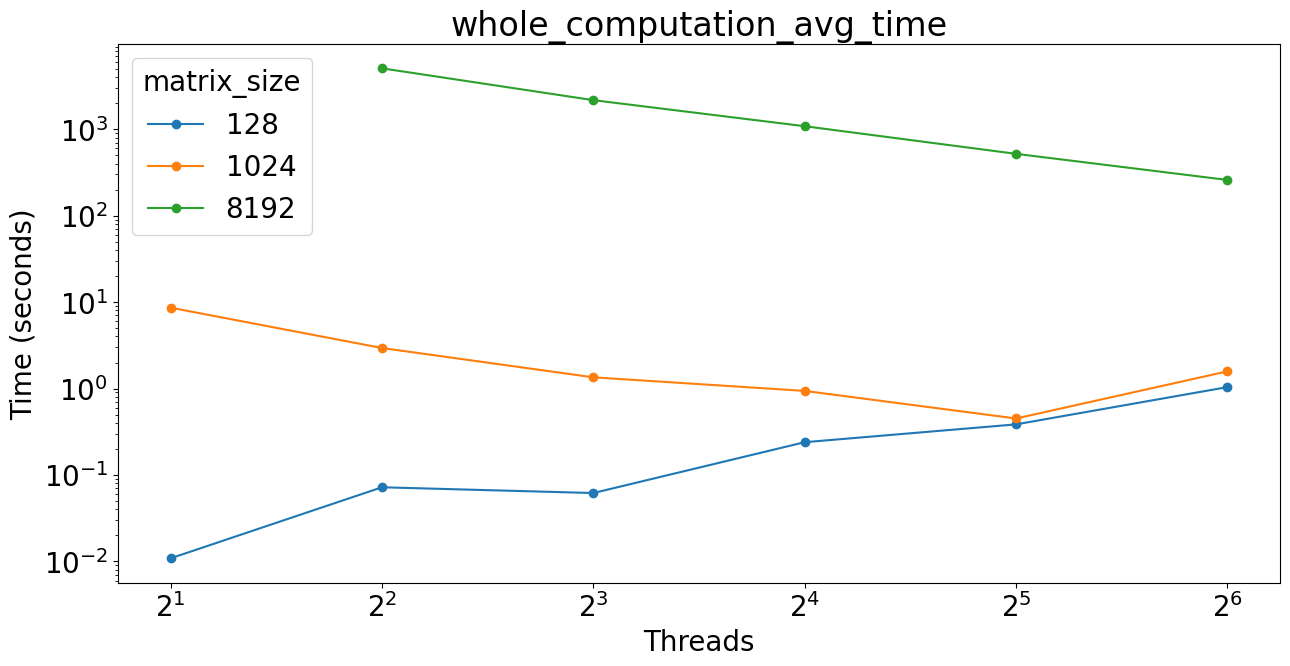

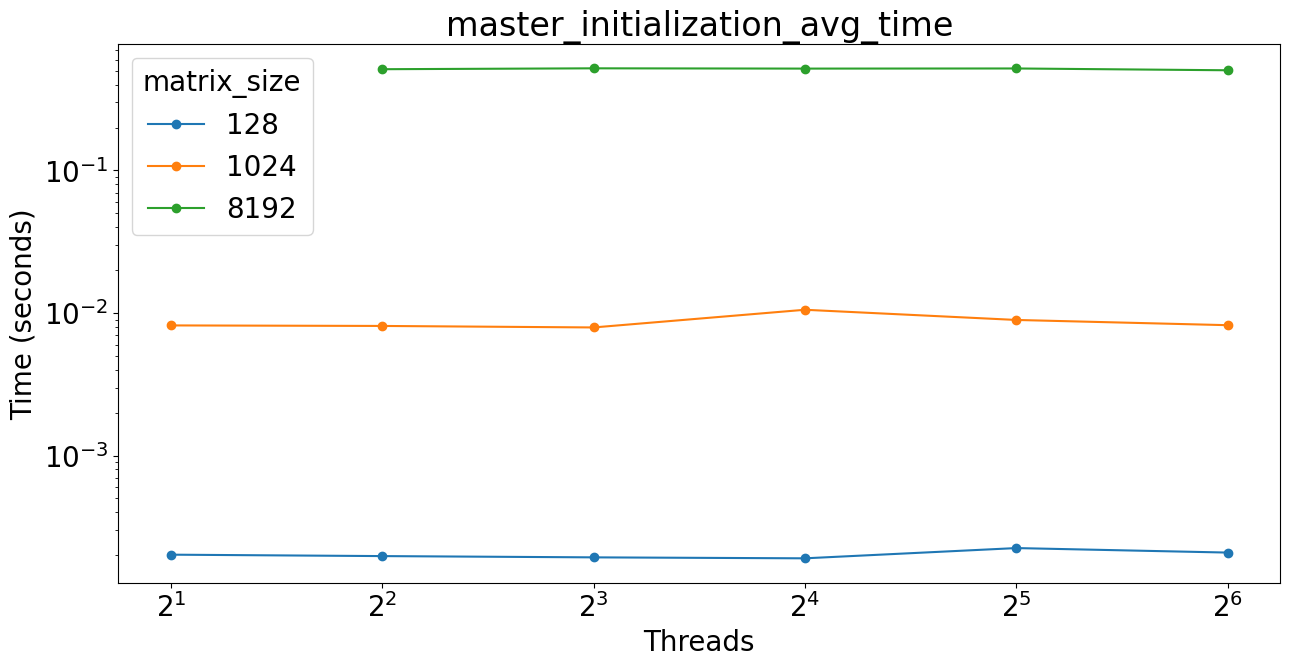

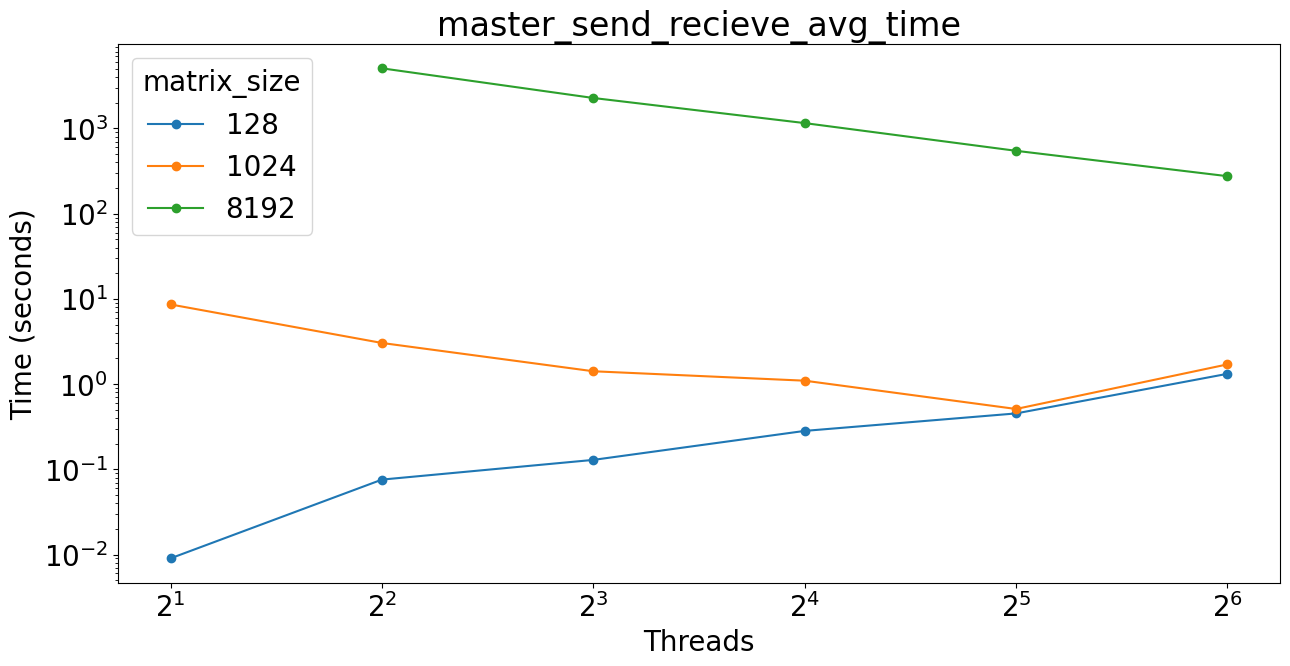

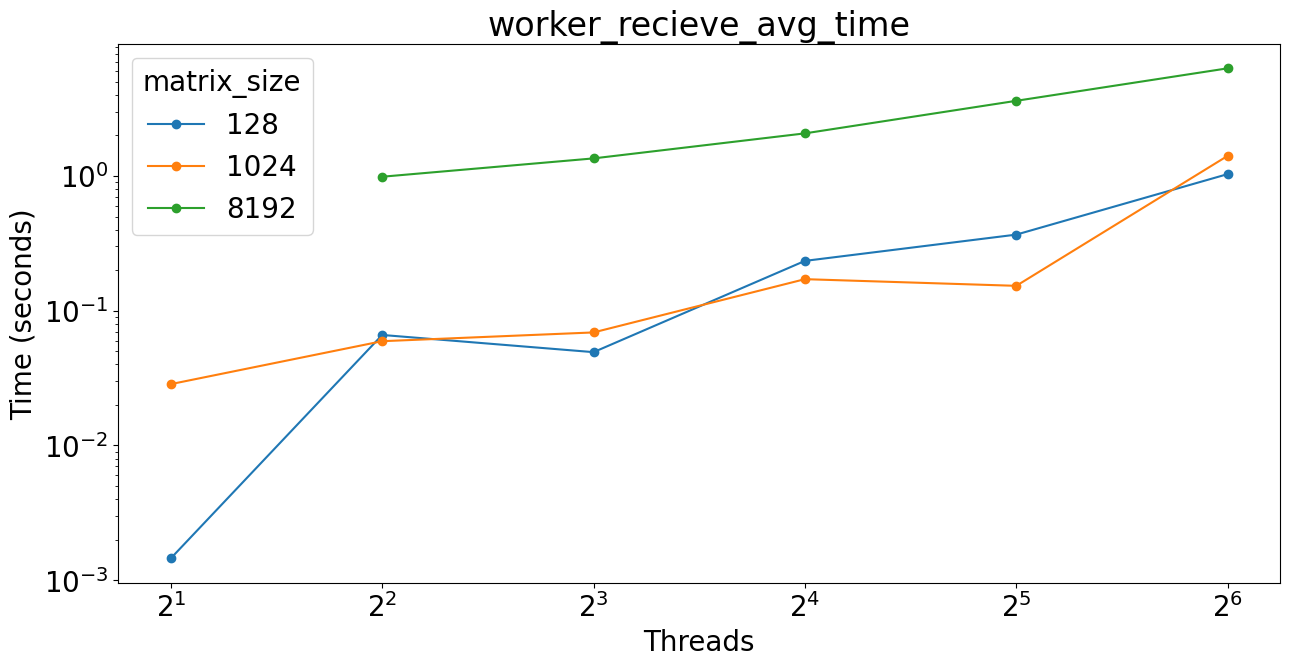

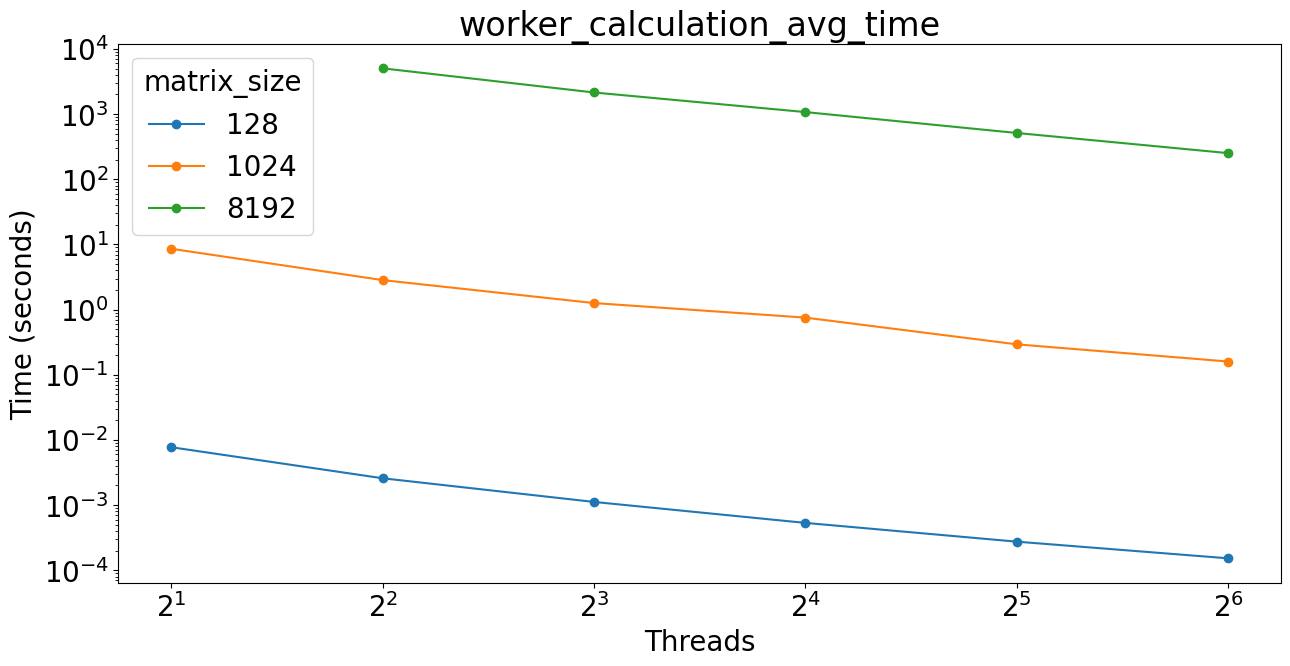

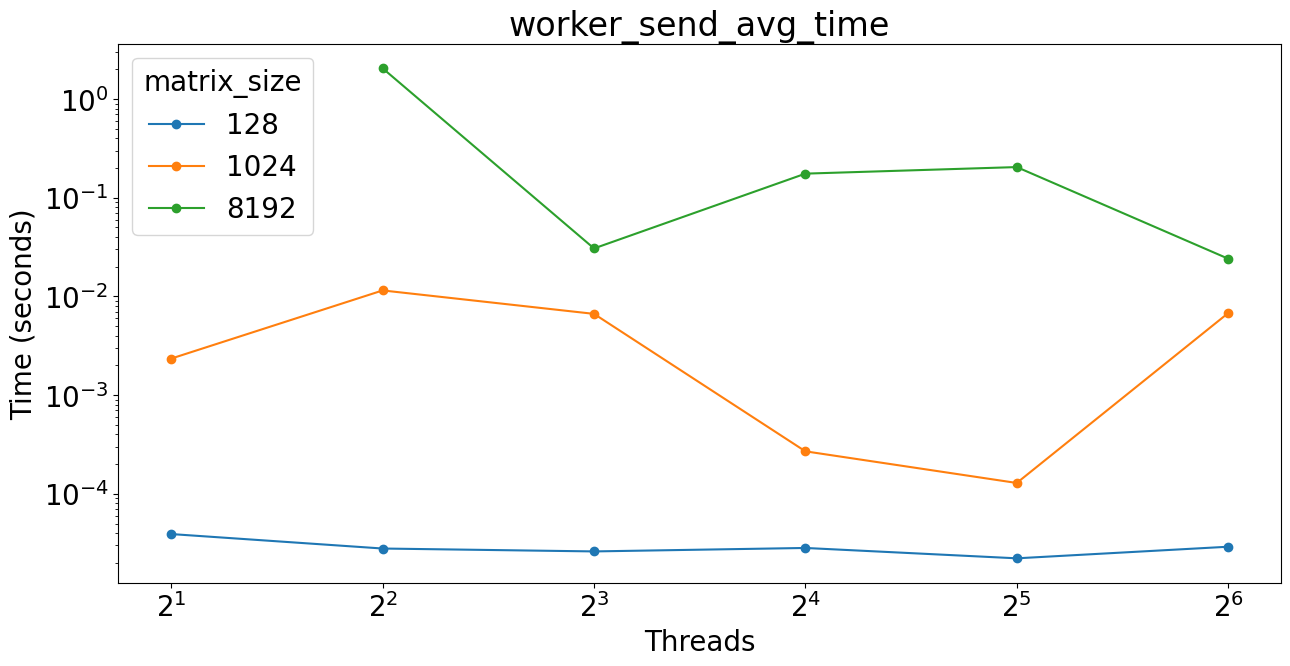

In [23]:
for node in tk.graph.traverse():
    if (node.frame["name"] != 'main'):

        plot_pandas(
            df=tk.dataframe.loc[node,
                                "Avg time/rank"].unstack(level="matrix_size"),
            title=node.frame["name"] + "_avg_time",
            xlabel="Threads",
            ylabel="Time (seconds)",
        )

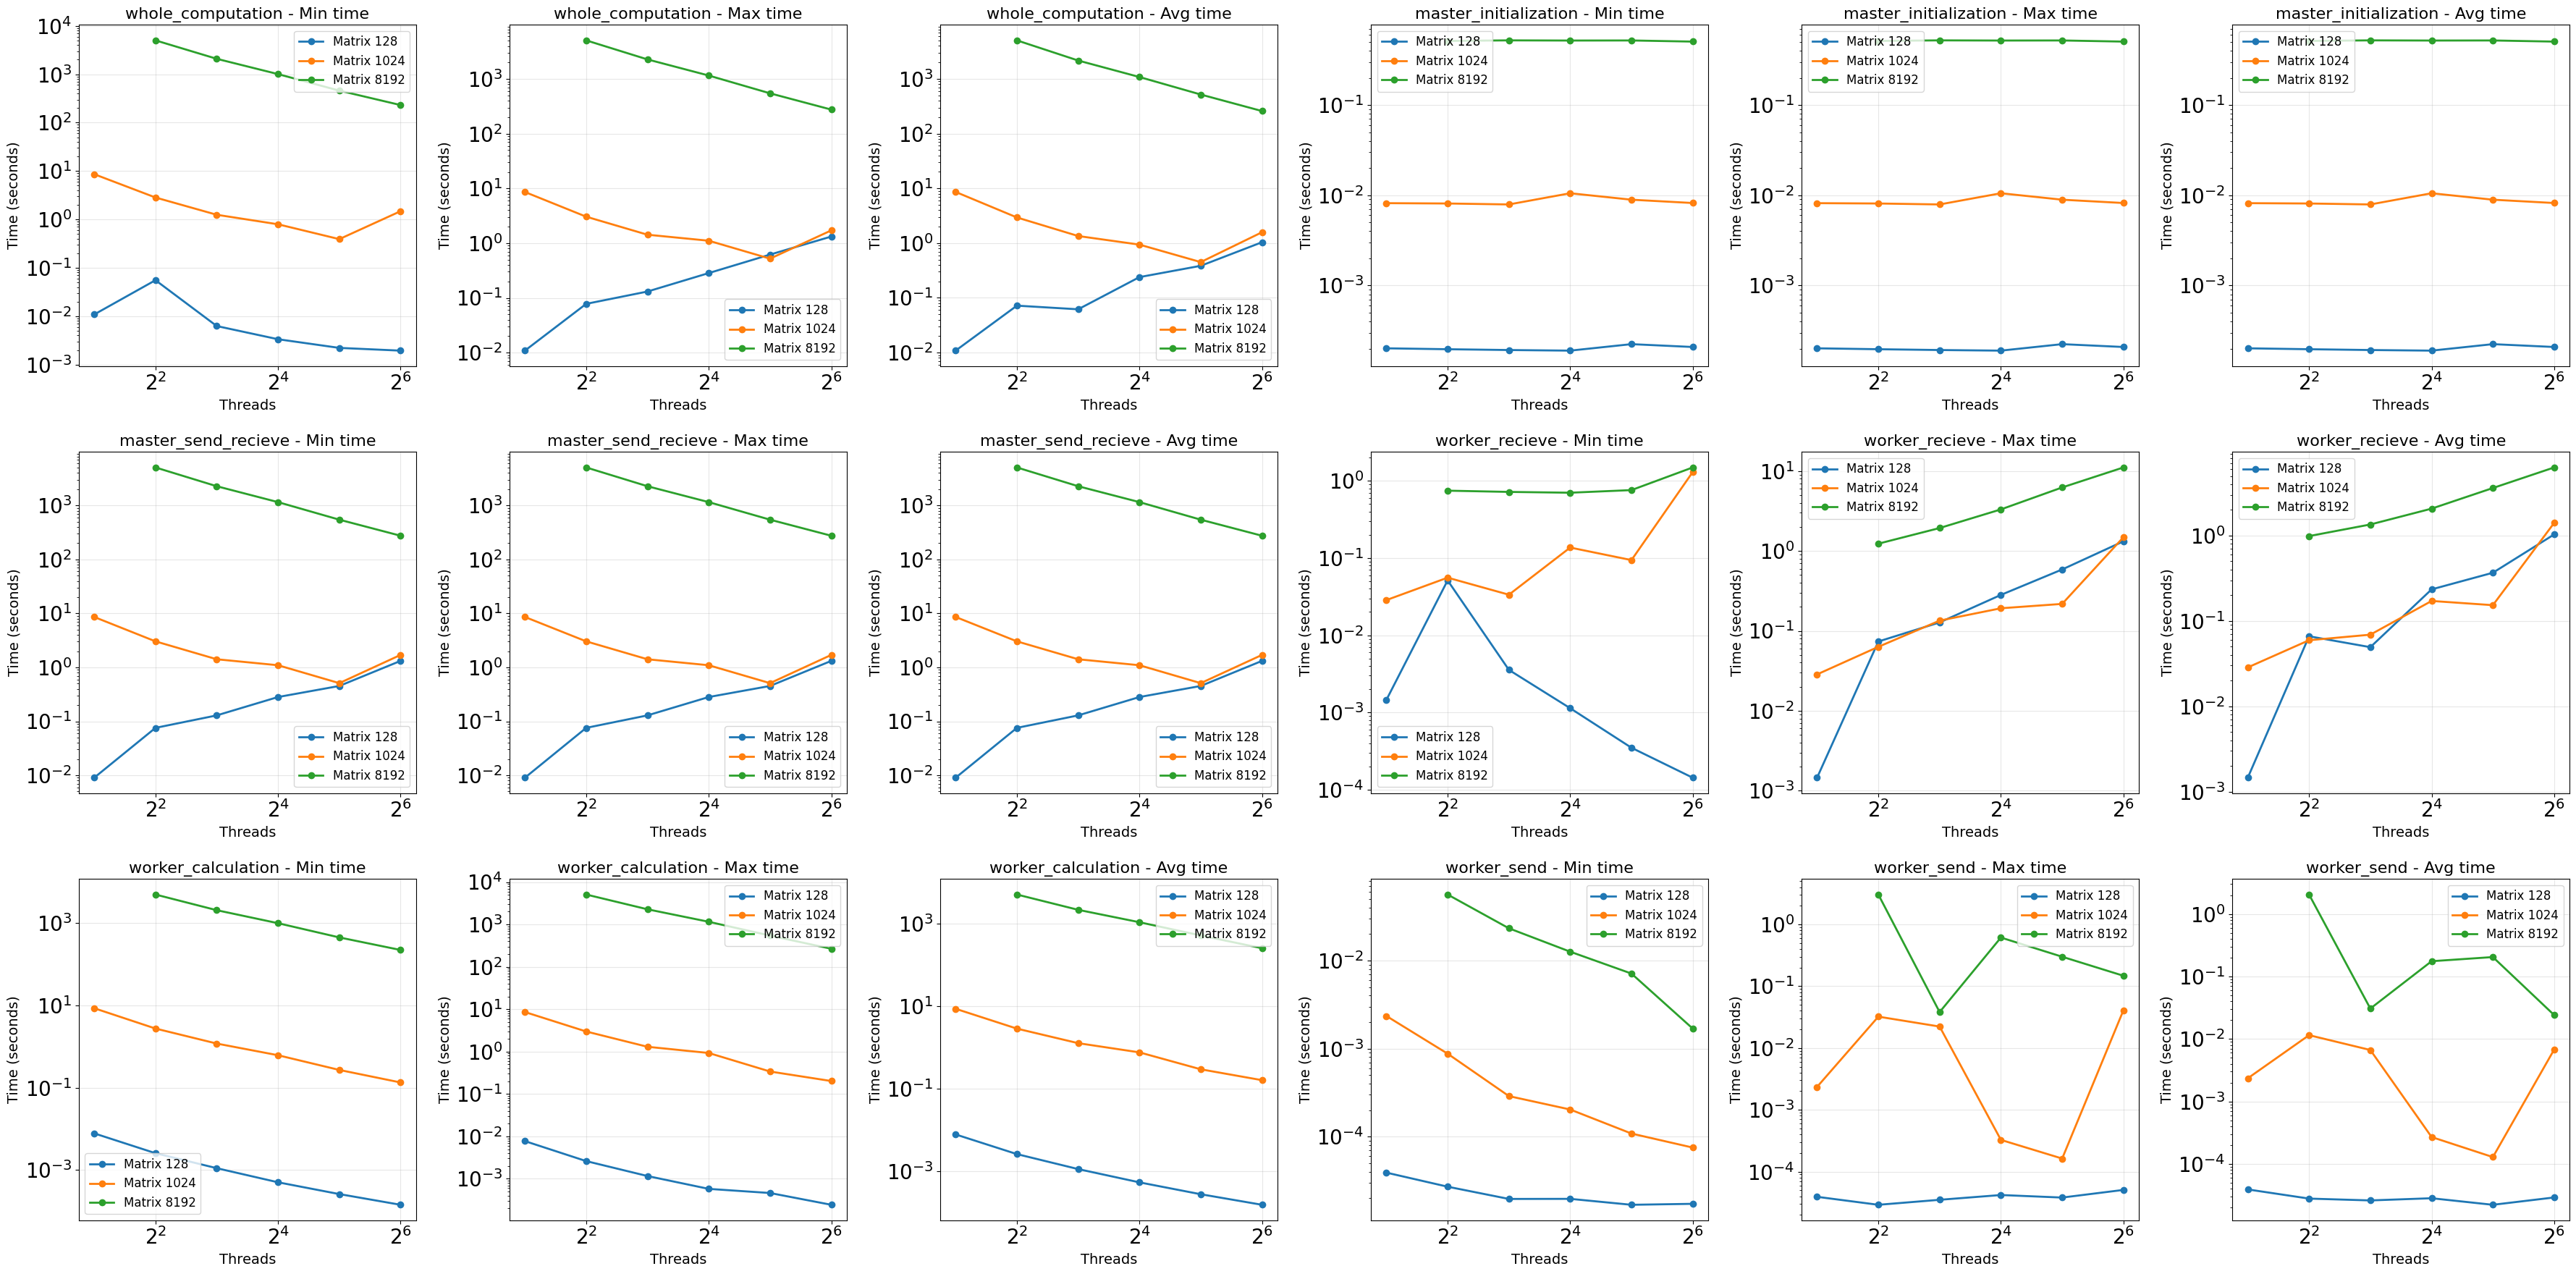

In [26]:
# Create all graphs in one figure - arrange in 3x6 grid
functions = [node.frame["name"] for node in tk.graph.traverse() if node.frame["name"] != 'main']
metrics = ["Min time/rank", "Max time/rank", "Avg time/rank"]
metric_labels = ["Min time", "Max time", "Avg time"]

# Create 3x6 grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(36, 18))

# Flatten axes for easier indexing
axes = axes.flatten()

plot_idx = 0
for func_idx, node in enumerate(tk.graph.traverse()):
    if node.frame["name"] != 'main':
        function_name = node.frame["name"]
        
        for metric_idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
            if plot_idx < len(axes):  # Make sure we don't exceed available subplots
                ax = axes[plot_idx]
                
                # Get data for this function and metric
                data = tk.dataframe.loc[node, metric].unstack(level="matrix_size")
                
                # Plot each matrix size
                for matrix_size in data.columns:
                    ax.plot(data.index, data[matrix_size], 
                           marker='o', 
                           label=f"Matrix {matrix_size}",
                           linewidth=2, markersize=6)
                
                ax.set_xscale("log", base=2)
                ax.set_yscale('log')
                ax.set_xlabel("Threads", fontsize=14)
                ax.set_ylabel("Time (seconds)", fontsize=14)
                ax.set_title(f"{function_name} - {label}", fontsize=16)
                ax.legend(fontsize=12)
                ax.grid(True, alpha=0.3)
                
                plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()